In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
df = pd.read_csv('../datasets/obesity.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
df.head(10)

Dataset Shape: (2111, 17)

First 10 rows:


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
print("Dataset Info:")
df.info()

print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
print(f"\nTotal Columns: {len(df.columns)}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), obje

In [4]:
print("Data Types Summary:")
print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Count: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  - {col}")

print("\nCategorical/Object Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Count: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"  - {col}")

Data Types Summary:

Numerical Columns:
Count: 8
  - Age
  - Height
  - Weight
  - FCVC
  - NCP
  - CH2O
  - FAF
  - TUE

Categorical/Object Columns:
Count: 9
  - Gender
  - family_history
  - FAVC
  - CAEC
  - SMOKE
  - SCC
  - CALC
  - MTRANS
  - Obesity


In [5]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Found:")
    print(missing_df)
    print("\n⚠ Action needed: Handle missing values")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Column'], missing_df['Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values! Data is clean.")

✓ No missing values! Data is clean.


In [6]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
print(f"Percentage: {(duplicates/len(df))*100:.2f}%")

if duplicates > 0:
    print("\n⚠ Removing duplicates...")
    df_clean = df.drop_duplicates()
    print(f"Original shape: {df.shape}")
    print(f"After removing duplicates: {df_clean.shape}")
    print(f"Removed: {len(df) - len(df_clean)} rows")
    
    # Update dataframe
    df = df_clean.copy()
else:
    print("✓ No duplicates found!")

Duplicate Rows: 24
Percentage: 1.14%

⚠ Removing duplicates...
Original shape: (2111, 17)
After removing duplicates: (2087, 17)
Removed: 24 rows


In [7]:
if numerical_cols:
    print("Statistical Summary (Numerical Columns):")
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found!")

Statistical Summary (Numerical Columns):
               Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       

In [8]:
print("Unique Values Analysis:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    print(f"  Data type: {df[col].dtype}")
    
    if unique_count <= 20:  # Show if not too many
        print(f"  Values: {sorted(df[col].unique())}")
    else:
        print(f"  Sample (first 10): {df[col].unique()[:10]}")

Unique Values Analysis:

Gender:
  Unique values: 2
  Data type: object
  Values: ['Female', 'Male']

Age:
  Unique values: 1402
  Data type: float64
  Sample (first 10): [21. 23. 27. 22. 29. 24. 26. 41. 30. 52.]

Height:
  Unique values: 1574
  Data type: float64
  Sample (first 10): [1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77]

Weight:
  Unique values: 1525
  Data type: float64
  Sample (first 10): [ 64.   56.   77.   87.   89.8  53.   55.   68.  105.   80. ]

family_history:
  Unique values: 2
  Data type: object
  Values: ['no', 'yes']

FAVC:
  Unique values: 2
  Data type: object
  Values: ['no', 'yes']

FCVC:
  Unique values: 810
  Data type: float64
  Sample (first 10): [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939]

NCP:
  Unique values: 635
  Data type: float64
  Sample (first 10): [3.       1.       4.       3.28926  3.995147 1.72626  2.581015 1.600812
 1.73762  1.10548 ]

CAEC:
  Unique values: 4
  Data type: object
  Valu

Target Variable Identified: Obesity

Target Distribution:
Obesity
Insufficient_Weight    267
Normal_Weight          282
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     276
Overweight_Level_II    290
Name: count, dtype: int64

Target Percentage:
Obesity
Insufficient_Weight    12.793483
Normal_Weight          13.512218
Obesity_Type_I         16.818400
Obesity_Type_II        14.230954
Obesity_Type_III       15.524677
Overweight_Level_I     13.224724
Overweight_Level_II    13.895544
Name: proportion, dtype: float64


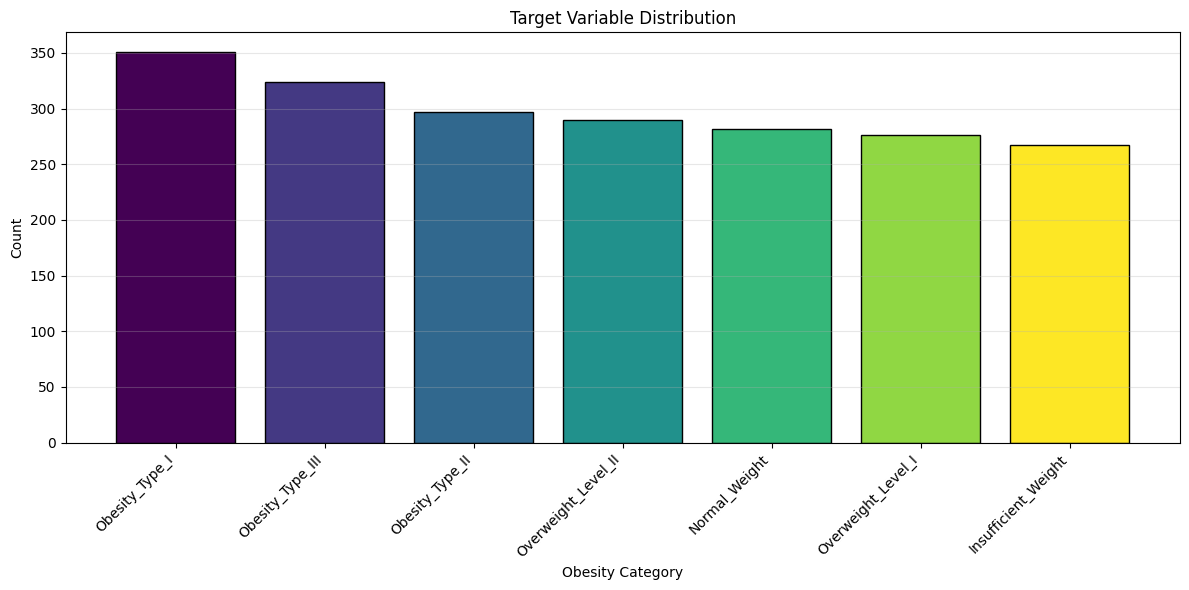


✓ Dataset is relatively balanced! Ratio: 1.31:1


In [9]:
# Identify target column
target_keywords = ['obesity', 'label', 'class', 'category', 'target', 'nobeyesdad', 'bmi_class']

target_col = None
for col in df.columns:
    col_lower = col.lower()
    for keyword in target_keywords:
        if keyword in col_lower:
            target_col = col
            break
    if target_col:
        break

if not target_col:
    # If not found, check last column or ask user
    print("⚠ Target column not obvious. Please identify manually.")
    print("Potential candidates:")
    for col in df.columns:
        print(f"  - {col} (unique values: {df[col].nunique()})")
else:
    print(f"Target Variable Identified: {target_col}")
    print("="*60)
    
    print("\nTarget Distribution:")
    print(df[target_col].value_counts().sort_index())
    
    print("\nTarget Percentage:")
    print((df[target_col].value_counts(normalize=True) * 100).sort_index())
    
    # Visualize
    plt.figure(figsize=(12, 6))
    target_counts = df[target_col].value_counts()
    colors = plt.cm.viridis(np.linspace(0, 1, len(target_counts)))
    plt.bar(range(len(target_counts)), target_counts.values, color=colors, edgecolor='black')
    plt.xticks(range(len(target_counts)), target_counts.index, rotation=45, ha='right')
    plt.xlabel('Obesity Category')
    plt.ylabel('Count')
    plt.title('Target Variable Distribution')
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Check balance
    max_count = target_counts.max()
    min_count = target_counts.min()
    imbalance_ratio = max_count / min_count
    
    if imbalance_ratio > 3:
        print(f"\n⚠ Dataset is imbalanced! Ratio: {imbalance_ratio:.2f}:1")
        print("Consider using class_weight='balanced' in model")
    else:
        print(f"\n✓ Dataset is relatively balanced! Ratio: {imbalance_ratio:.2f}:1")

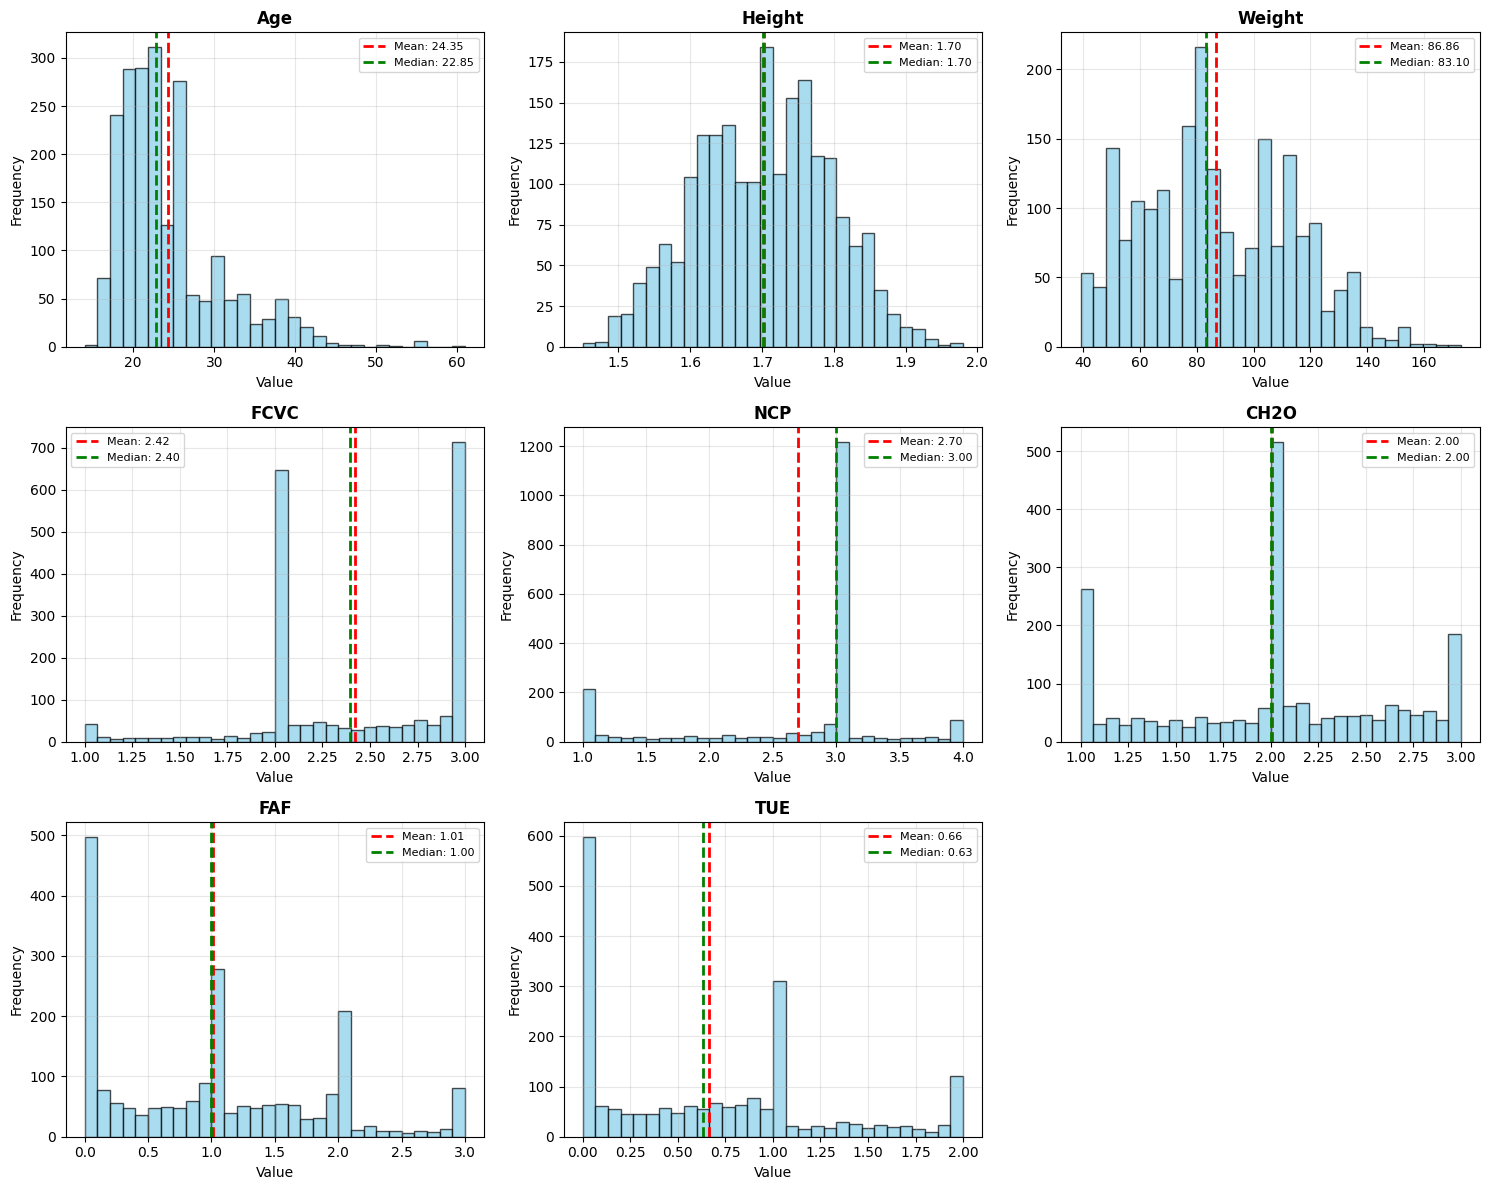

In [10]:
if numerical_cols:
    n_cols = len(numerical_cols)
    n_rows = (n_cols // 3) + (1 if n_cols % 3 else 0)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
    if n_rows == 1:
        axes = [axes]
    axes = np.array(axes).flatten()
    
    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(alpha=0.3)
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[i].legend(fontsize=8)
    
    # Hide extra subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to visualize!")

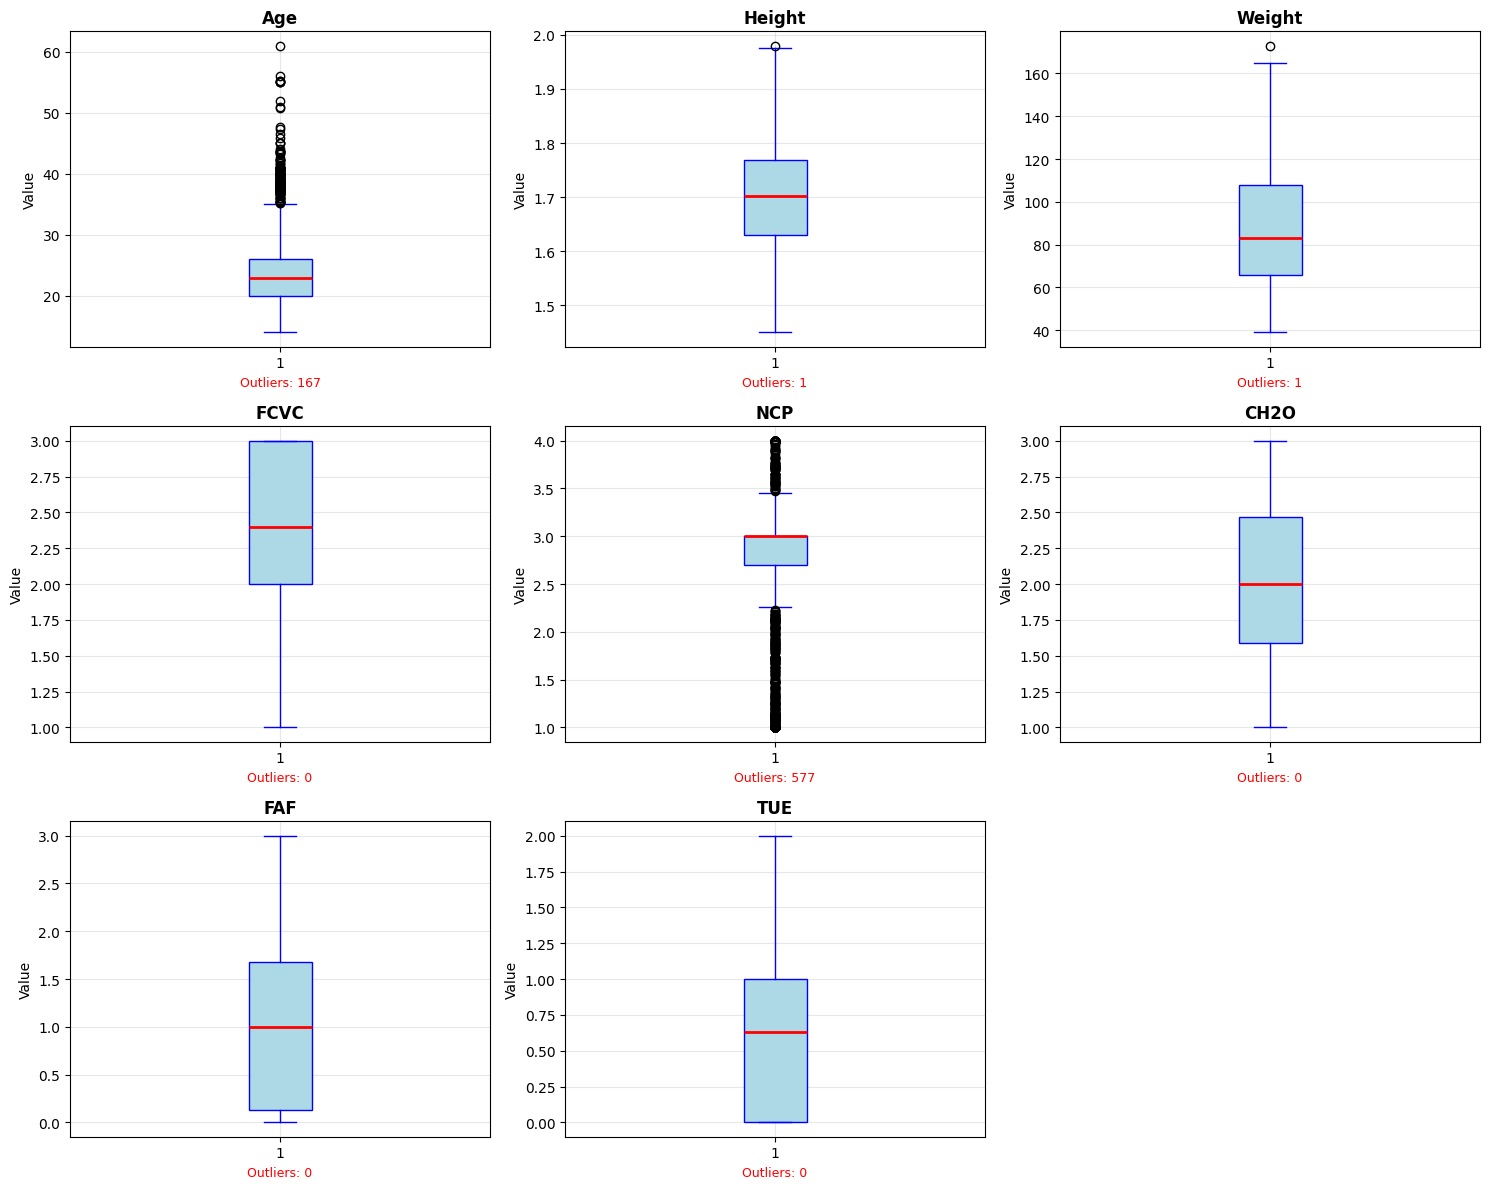

In [11]:
if numerical_cols:
    n_cols = len(numerical_cols)
    n_rows = (n_cols // 3) + (1 if n_cols % 3 else 0)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
    if n_rows == 1:
        axes = [axes]
    axes = np.array(axes).flatten()
    
    for i, col in enumerate(numerical_cols):
        axes[i].boxplot(df[col].dropna(), patch_artist=True,
                        boxprops=dict(facecolor='lightblue', color='blue'),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(color='blue'),
                        capprops=dict(color='blue'))
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_ylabel('Value')
        axes[i].grid(alpha=0.3)
        
        # Count outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
        axes[i].set_xlabel(f'Outliers: {len(outliers)}', fontsize=9, color='red')
    
    # Hide extra subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features for outlier detection!")

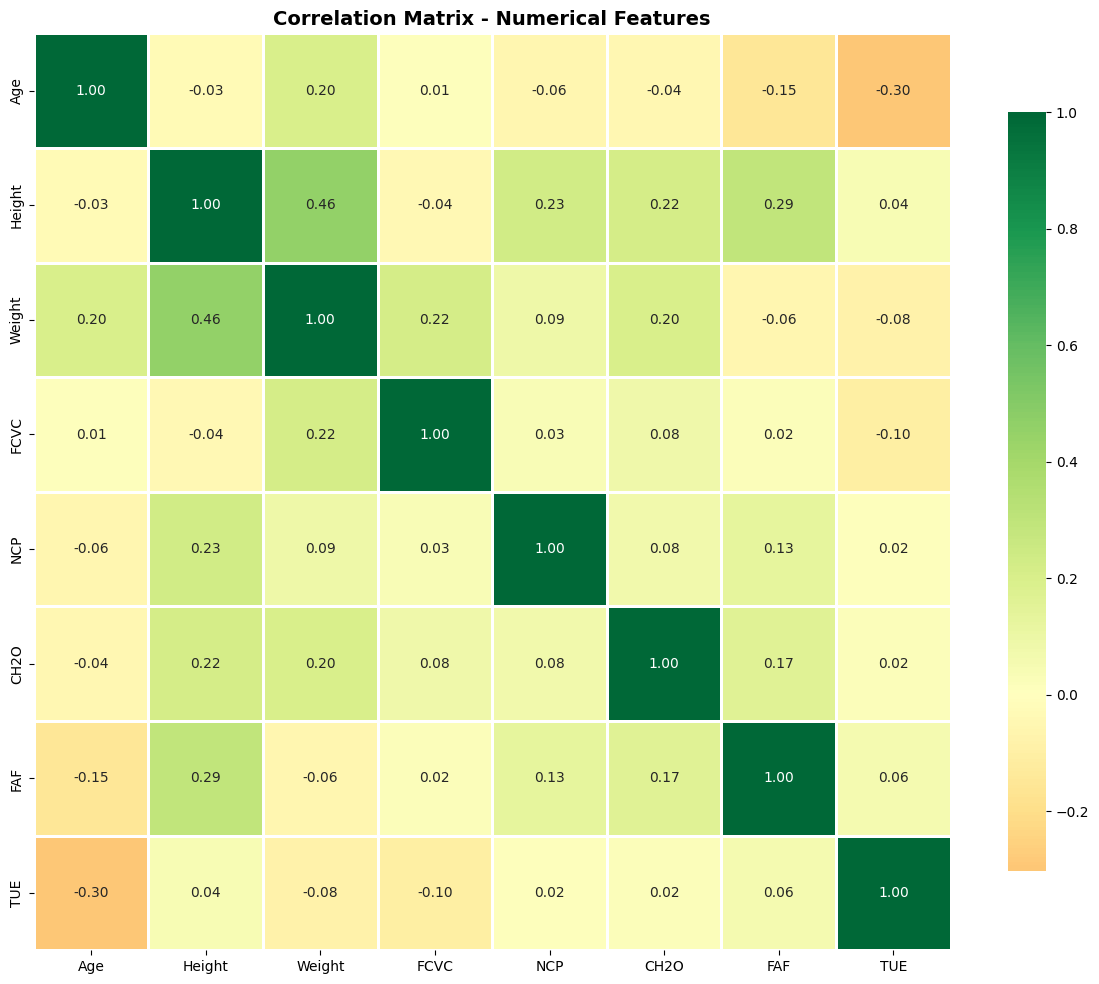


✓ No high multicollinearity detected!


In [12]:
if len(numerical_cols) > 1:
    correlation = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find high correlations
    high_corr_pairs = []
    for i in range(len(correlation.columns)):
        for j in range(i+1, len(correlation.columns)):
            if abs(correlation.iloc[i, j]) > 0.8:
                high_corr_pairs.append((correlation.columns[i], 
                                       correlation.columns[j], 
                                       correlation.iloc[i, j]))
    
    if high_corr_pairs:
        print("\nHighly Correlated Features (>0.8):")
        for pair in high_corr_pairs:
            print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
        print("\n⚠ Consider removing one from each highly correlated pair")
    else:
        print("\n✓ No high multicollinearity detected!")
elif len(numerical_cols) == 1:
    print(f"Only one numerical column: {numerical_cols[0]}")
else:
    print("No numerical features for correlation analysis!")

Categorical Features Analysis:

Gender:
  Unique values: 2
  Value distribution:
    Male: 1052 (50.4%)
    Female: 1035 (49.6%)


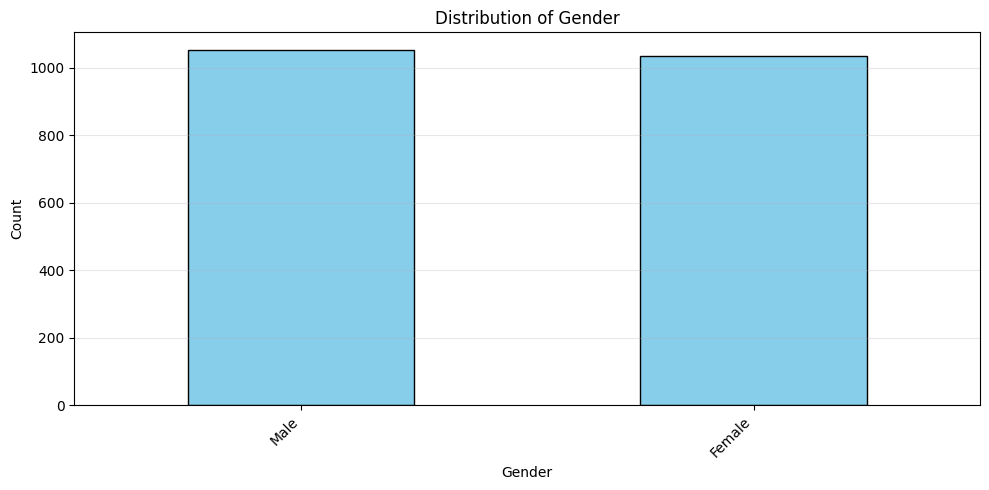


family_history:
  Unique values: 2
  Value distribution:
    yes: 1722 (82.5%)
    no: 365 (17.5%)


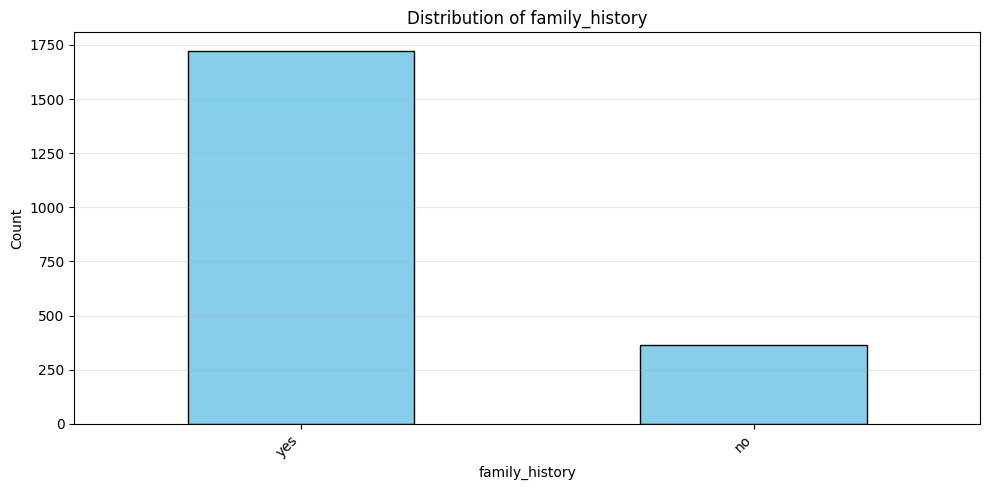


FAVC:
  Unique values: 2
  Value distribution:
    yes: 1844 (88.4%)
    no: 243 (11.6%)


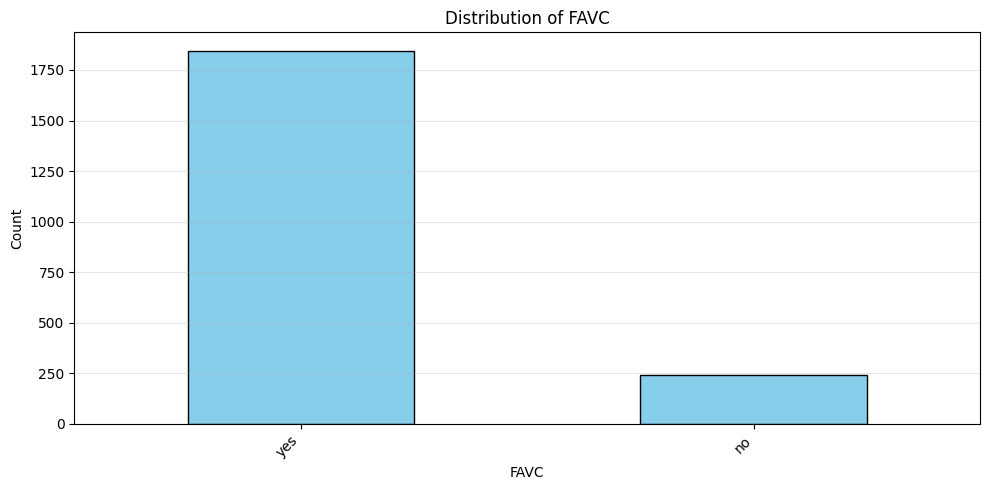


CAEC:
  Unique values: 4
  Value distribution:
    Sometimes: 1761 (84.4%)
    Frequently: 236 (11.3%)
    Always: 53 (2.5%)
    no: 37 (1.8%)


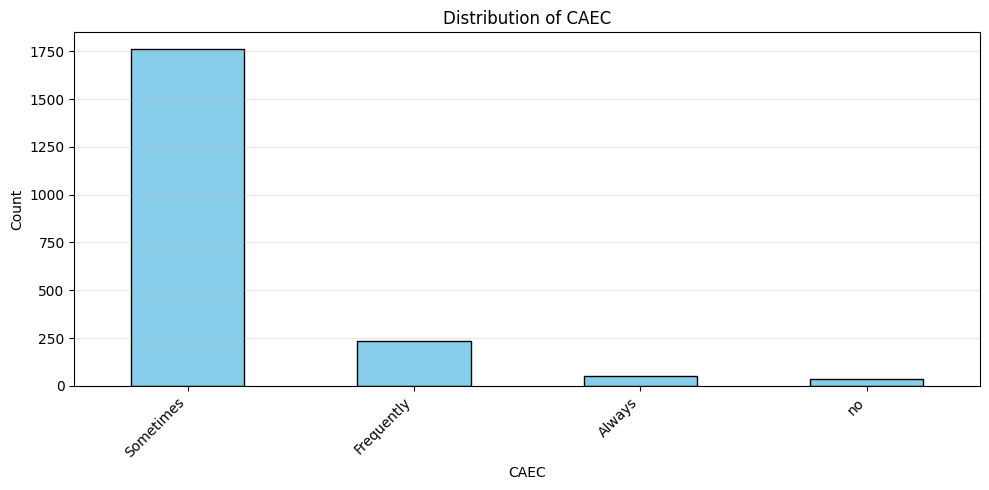


SMOKE:
  Unique values: 2
  Value distribution:
    no: 2043 (97.9%)
    yes: 44 (2.1%)


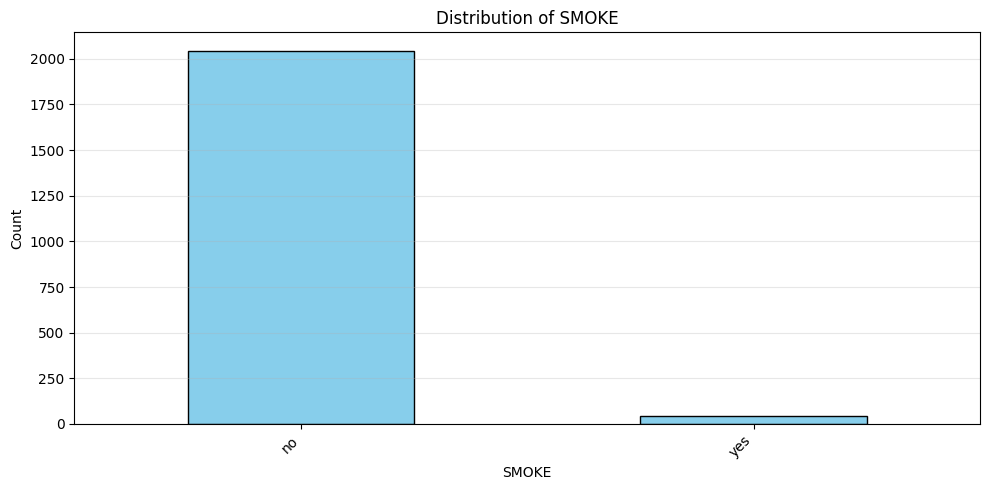


SCC:
  Unique values: 2
  Value distribution:
    no: 1991 (95.4%)
    yes: 96 (4.6%)


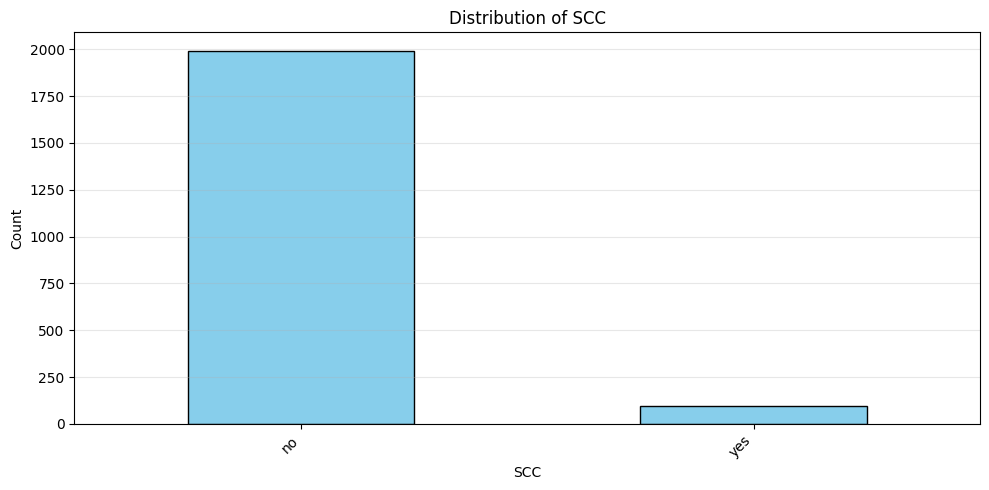


CALC:
  Unique values: 4
  Value distribution:
    Sometimes: 1380 (66.1%)
    no: 636 (30.5%)
    Frequently: 70 (3.4%)
    Always: 1 (0.0%)


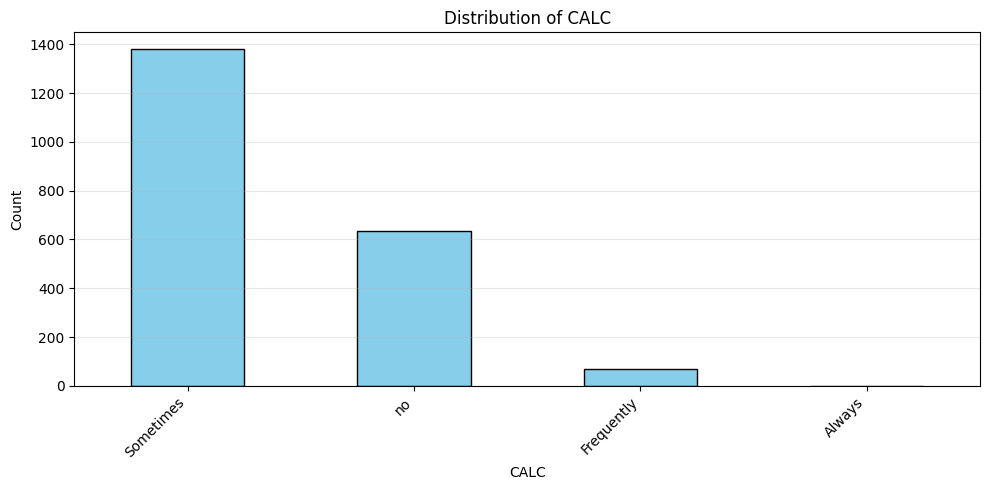


MTRANS:
  Unique values: 5
  Value distribution:
    Public_Transportation: 1558 (74.7%)
    Automobile: 456 (21.8%)
    Walking: 55 (2.6%)
    Motorbike: 11 (0.5%)
    Bike: 7 (0.3%)


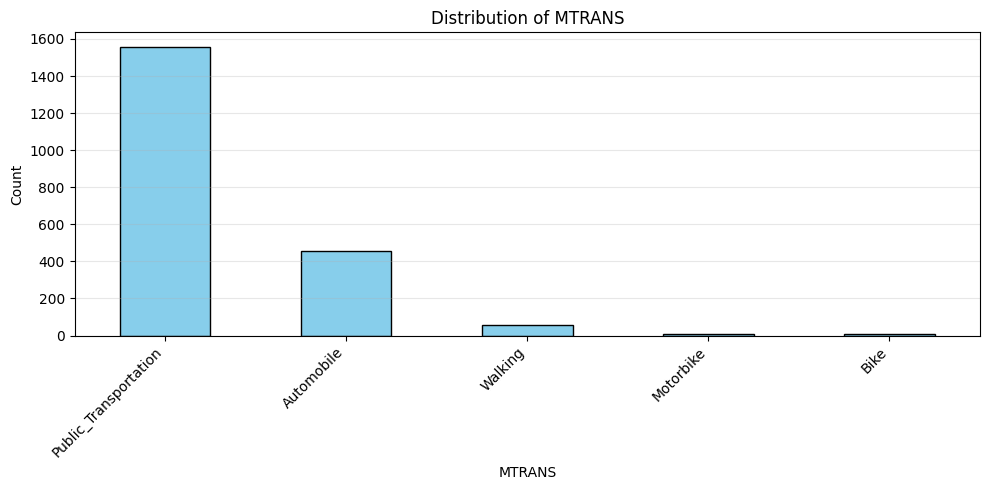

In [13]:
if categorical_cols:
    print("Categorical Features Analysis:")
    
    feature_cols = [col for col in categorical_cols if col != target_col]
    
    for col in feature_cols:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        value_counts = df[col].value_counts()
        print(f"  Value distribution:")
        for val, count in value_counts.items():
            pct = (count/len(df))*100
            print(f"    {val}: {count} ({pct:.1f}%)")
        
        # Visualize if not too many categories
        if df[col].nunique() <= 10:
            plt.figure(figsize=(10, 5))
            value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.grid(alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()

Feature vs Target Analysis:

Gender vs Obesity:
Obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
Gender                                                                         
Female                   169            137             156                2   
Male                      98            145             195              295   

Obesity  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
Gender                                                              
Female                323                 145                  103  
Male                    1                 131                  187  


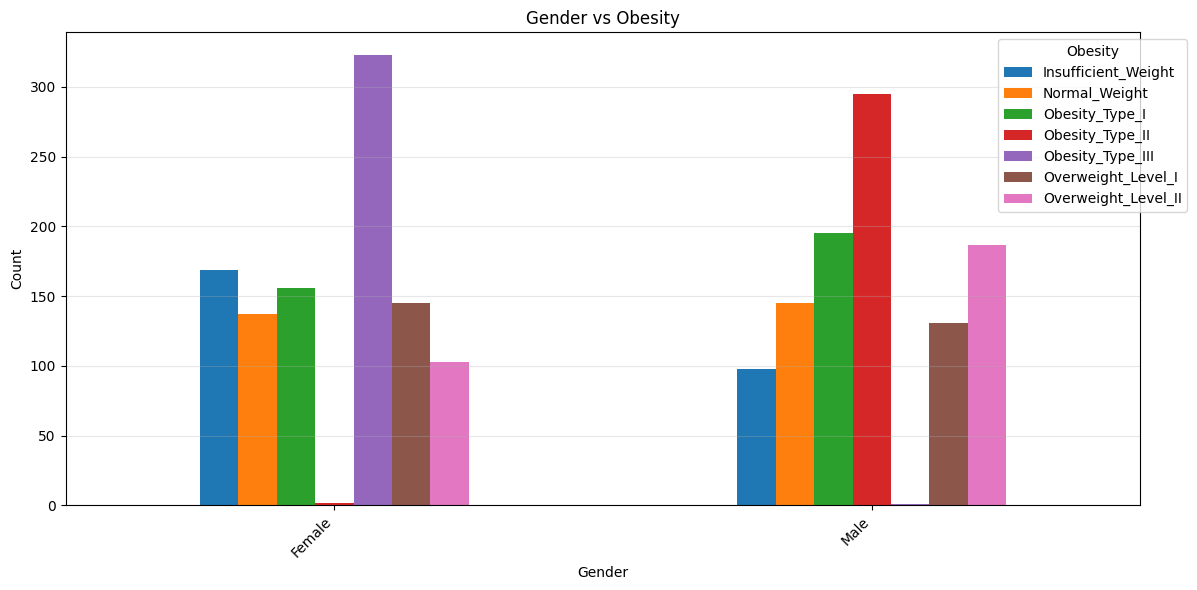


family_history vs Obesity:
Obesity         Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
family_history                                                       
no                              142            130               7   
yes                             125            152             344   

Obesity         Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
family_history                                                          
no                            1                 0                  67   
yes                         296               324                 209   

Obesity         Overweight_Level_II  
family_history                       
no                               18  
yes                             272  


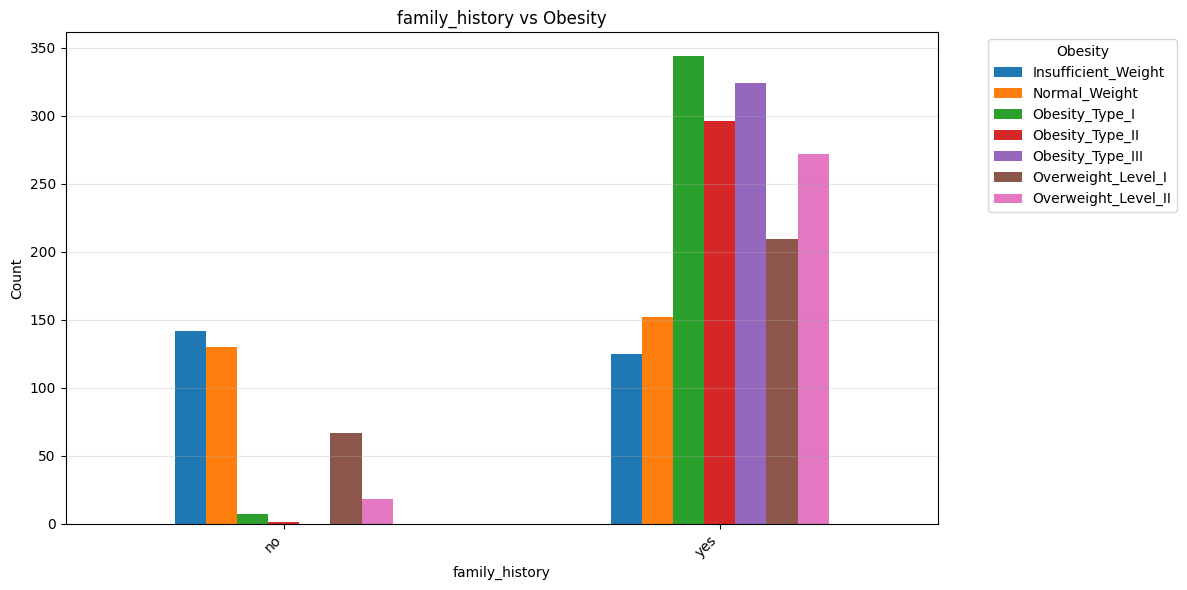


FAVC vs Obesity:
Obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
FAVC                                                                           
no                        50             78              11                7   
yes                      217            204             340              290   

Obesity  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
FAVC                                                                
no                      1                  22                   74  
yes                   323                 254                  216  


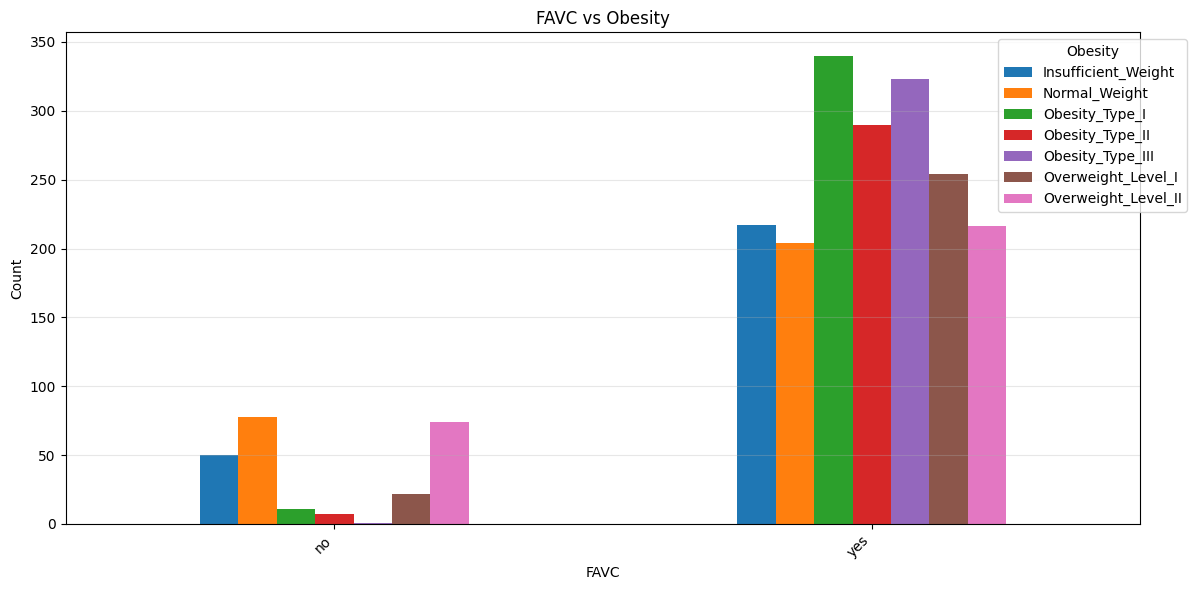


CAEC vs Obesity:
Obesity     Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CAEC                                                             
Always                        2             35               6   
Frequently                  117             81               6   
Sometimes                   145            156             338   
no                            3             10               1   

Obesity     Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CAEC                                                                
Always                    2                 0                   5   
Frequently                1                 1                  14   
Sometimes               293               323                 236   
no                        1                 0                  21   

Obesity     Overweight_Level_II  
CAEC                             
Always                        3  
Frequently                   16  
Sometimes                   270  


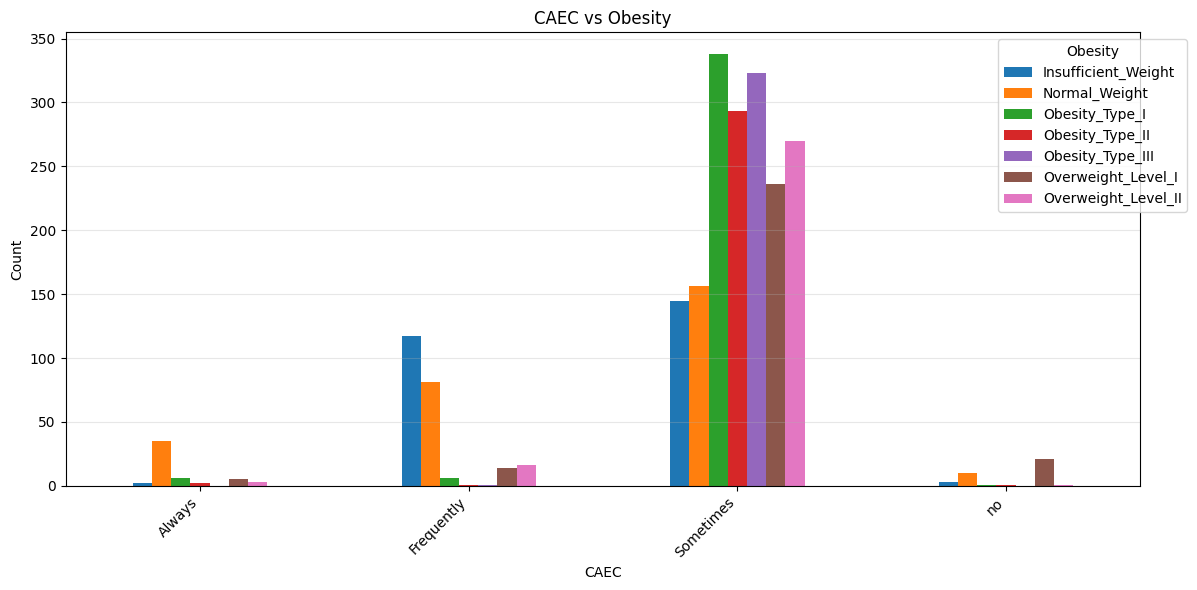


SMOKE vs Obesity:
Obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
SMOKE                                                                          
no                       266            269             345              282   
yes                        1             13               6               15   

Obesity  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
SMOKE                                                               
no                    323                 273                  285  
yes                     1                   3                    5  


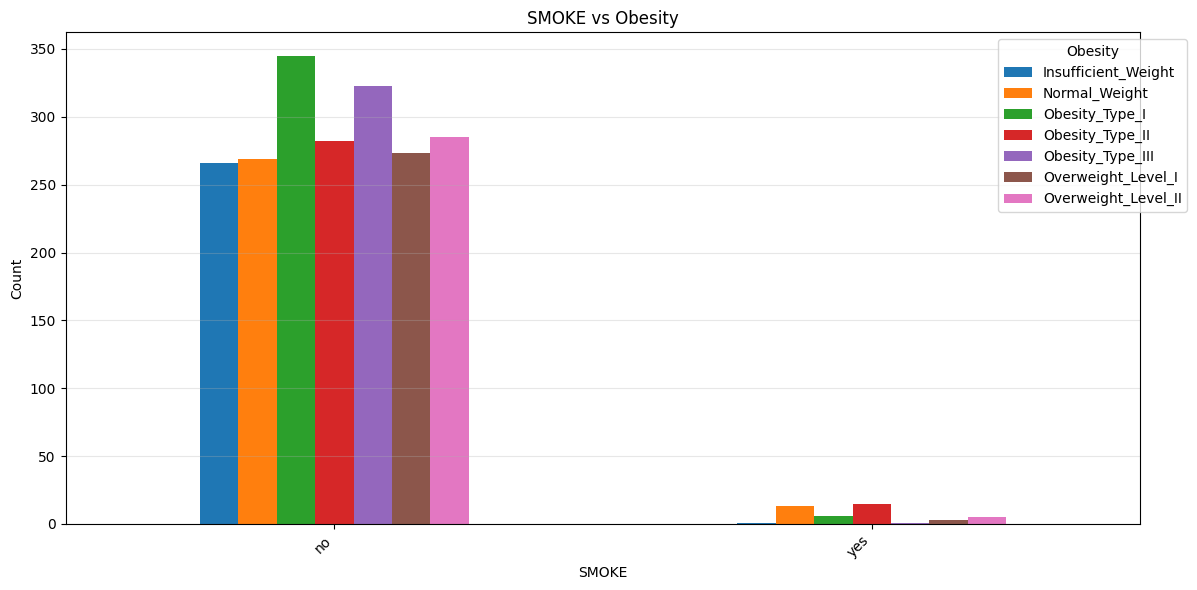

In [14]:
if target_col and categorical_cols:
    feature_cols = [col for col in categorical_cols if col != target_col]
    
    if feature_cols:
        print("Feature vs Target Analysis:")
    
        
        # Show first 5 categorical features
        for feature in feature_cols[:5]:
            if df[feature].nunique() <= 10:
                print(f"\n{feature} vs {target_col}:")
                crosstab = pd.crosstab(df[feature], df[target_col])
                print(crosstab)
                
                # Visualize
                crosstab.plot(kind='bar', stacked=False, figsize=(12, 6))
                plt.title(f'{feature} vs {target_col}')
                plt.xlabel(feature)
                plt.ylabel('Count')
                plt.legend(title=target_col, bbox_to_anchor=(1.05, 1))
                plt.xticks(rotation=45, ha='right')
                plt.grid(alpha=0.3, axis='y')
                plt.tight_layout()
                plt.show()

Numerical Features vs Target:


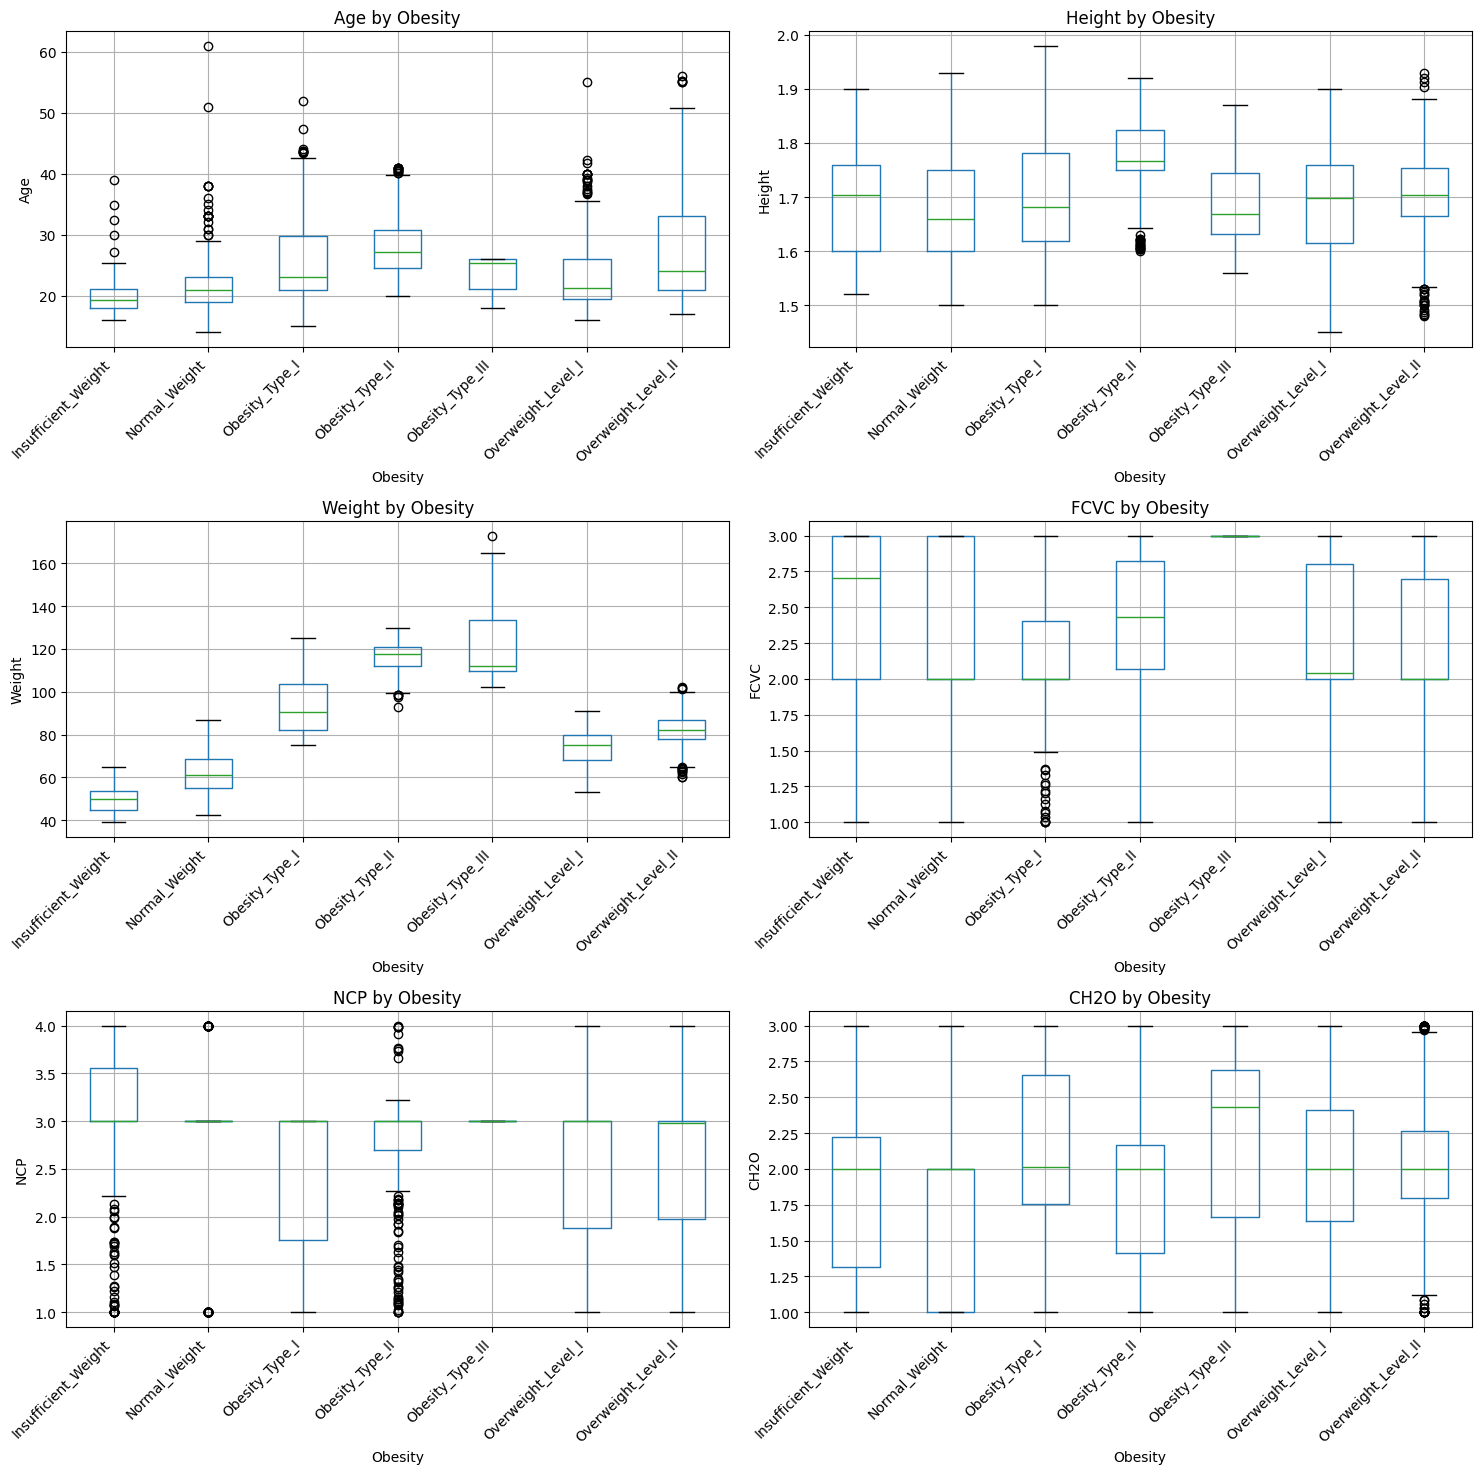

In [15]:
if target_col and numerical_cols:
    print("Numerical Features vs Target:")
 
    
    # Box plots for first 6 numerical features
    features_to_plot = numerical_cols[:6]
    
    n_cols = 2
    n_rows = (len(features_to_plot) // n_cols) + (1 if len(features_to_plot) % n_cols else 0)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, feature in enumerate(features_to_plot):
        df.boxplot(column=feature, by=target_col, ax=axes[i])
        axes[i].set_title(f'{feature} by {target_col}')
        axes[i].set_xlabel(target_col)
        axes[i].set_ylabel(feature)
        plt.sca(axes[i])
        plt.xticks(rotation=45, ha='right')
    
    # Hide extra subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

In [16]:
print("Checking for constant/zero-variance columns:")

constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)
        print(f"⚠ {col}: Only has value '{df[col].unique()[0]}'")

if constant_cols:
    print(f"\n⚠ Recommendation: Drop {len(constant_cols)} constant column(s)")
else:
    print("\n✓ All columns have variance")

Checking for constant/zero-variance columns:

✓ All columns have variance


In [17]:
print("DATA QUALITY SUMMARY")
print(f"\n1. Dataset Size:")
print(f"   - Rows: {df.shape[0]:,}")
print(f"   - Columns: {df.shape[1]}")

if target_col:
    print(f"\n2. Target Variable:")
    print(f"   - Column: {target_col}")
    print(f"   - Unique classes: {df[target_col].nunique()}")
    print(f"   - Classes: {sorted(df[target_col].unique())}")

print(f"\n3. Data Quality:")
missing_total = df.isnull().sum().sum()
print(f"   - Missing values: {missing_total}")
print(f"   - Duplicates: {df.duplicated().sum()}")
print(f"   - Constant columns: {len(constant_cols) if constant_cols else 0}")

print(f"\n4. Feature Types:")
print(f"   - Numerical: {len(numerical_cols)}")
print(f"   - Categorical: {len(categorical_cols)}")

print(f"\n5. Data Issues Found:")
issues = []
if missing_total > 0:
    issues.append(f"   ⚠ {missing_total} missing values")
if df.duplicated().sum() > 0:
    issues.append(f"   ⚠ {df.duplicated().sum()} duplicate rows")
if constant_cols:
    issues.append(f"   ⚠ {len(constant_cols)} constant columns")
if target_col and 'imbalance_ratio' in locals() and imbalance_ratio > 3:
    issues.append(f"   ⚠ Imbalanced target (ratio: {imbalance_ratio:.1f}:1)")

if issues:
    for issue in issues:
        print(issue)
else:
    print("   ✓ No major issues found!")

DATA QUALITY SUMMARY

1. Dataset Size:
   - Rows: 2,087
   - Columns: 17

2. Target Variable:
   - Column: Obesity
   - Unique classes: 7
   - Classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

3. Data Quality:
   - Missing values: 0
   - Duplicates: 0
   - Constant columns: 0

4. Feature Types:
   - Numerical: 8
   - Categorical: 9

5. Data Issues Found:
   ✓ No major issues found!


In [19]:

print("RECOMMENDATIONS FOR MODEL TRAINING")


print("\n1. Data Cleaning:")
cleaning_steps = []
if df.isnull().sum().sum() > 0:
    cleaning_steps.append("   - Impute or remove missing values")
if df.duplicated().sum() > 0:
    cleaning_steps.append("   - Remove duplicate rows")
if constant_cols:
    cleaning_steps.append(f"   - Drop constant columns: {constant_cols}")
if high_corr_pairs:
    cleaning_steps.append("   - Remove one feature from highly correlated pairs")
if not cleaning_steps:
    cleaning_steps.append("   ✓ Data is clean!")

for step in cleaning_steps:
    print(step)

print("\n2. Feature Engineering:")
if categorical_cols:
    print("   - Encode categorical features (Label Encoding or One-Hot)")
if numerical_cols:
    print("   - Scale numerical features (StandardScaler)")
print("   - Consider creating BMI if Height & Weight available")

print("\n3. Model Selection:")
if target_col:
    n_classes = df[target_col].nunique()
    if n_classes == 2:
        print("   - Binary Classification Problem")
        print("   - Recommended: Logistic Regression, XGBoost, LightGBM")
    else:
        print(f"   - Multi-class Classification Problem ({n_classes} classes)")
        print("   - Recommended: LightGBM, XGBoost, Random Forest")
    
    if 'imbalance_ratio' in locals() and imbalance_ratio > 3:
        print("   - Use class_weight='balanced' for imbalanced data")

print("\n4. Next Steps:")
print("   1. Clean data based on recommendations")
print("   2. Encode categorical features")
print("   3. Scale numerical features")
print("   4. Train model (LightGBM recommended)")
print("   5. Evaluate with classification metrics")
print("   6. Save model for Django integration")


RECOMMENDATIONS FOR MODEL TRAINING

1. Data Cleaning:
   ✓ Data is clean!

2. Feature Engineering:
   - Encode categorical features (Label Encoding or One-Hot)
   - Scale numerical features (StandardScaler)
   - Consider creating BMI if Height & Weight available

3. Model Selection:
   - Multi-class Classification Problem (7 classes)
   - Recommended: LightGBM, XGBoost, Random Forest

4. Next Steps:
   1. Clean data based on recommendations
   2. Encode categorical features
   3. Scale numerical features
   4. Train model (LightGBM recommended)
   5. Evaluate with classification metrics
   6. Save model for Django integration
